# Mini Project: DSAI ML Regression

### Import the necessary libraries and load the dataset

In [1]:
# Import libraries for ML model training and evaluation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
# Load dataset
df = pd.read_excel('../data/regression_data.xls')
pd.set_option('display.float_format', '{:.2f}'.format)
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.00,0,0,3,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.00,0,0,3,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.00,0,0,3,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.00,0,0,5,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.00,0,0,3,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.00,0,0,3,...,1530,0,2009,0,98103,47.70,-122.35,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.00,0,0,3,...,2310,0,2014,0,98146,47.51,-122.36,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.00,0,0,3,...,1020,0,2009,0,98144,47.59,-122.30,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.00,0,0,3,...,1600,0,2004,0,98027,47.53,-122.07,1410,1287,400000


## Exploratory Data Analysis (EDA) and preprocessing

### Verify data types and check for missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [4]:
# Check for missing values
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [5]:
# Check unique values in 'yr_built' column
df['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [6]:
# Check unique values in 'yr_renovated' column
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [7]:
# Change yr_built from ex. 199X to number of years since built
current_year = 2025
df['years_since_built'] = current_year - df['yr_built']

In [8]:
# Change yr_renovated from ex. 199X to number of years since renovated if not 0, else 0
df['years_since_renovated'] = df['yr_renovated'].apply(lambda x: current_year - x if x != 0 else 0)

In [9]:
# Select relevant columns for analysis
selected_columns = ['bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'years_since_built', 'years_since_renovated', 'price']

In [10]:
df[selected_columns].describe()

,bedrooms,bathrooms,floors,sqft_lot,sqft_lot15,sqft_living,sqft_living15,sqft_above,sqft_basement,waterfront,view,condition,grade,years_since_built,years_since_renovated,price
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,3.37,2.12,1.49,15099.41,12758.28,2080.32,1986.62,1788.60,291.73,0.01,0.23,3.41,7.66,54.00,1.23,540296.57
std,0.93,0.77,0.54,41412.64,27274.44,918.11,685.23,827.76,442.67,0.09,0.77,0.65,1.17,29.38,6.68,367368.14
min,1.00,0.50,1.00,520.00,651.00,370.00,399.00,370.00,0.00,0.00,0.00,1.00,3.00,10.00,0.00,78000.00
25%,3.00,1.75,1.00,5040.00,5100.00,1430.00,1490.00,1190.00,0.00,0.00,0.00,3.00,7.00,28.00,0.00,322000.00
50%,3.00,2.25,1.50,7618.00,7620.00,1910.00,1840.00,1560.00,0.00,0.00,0.00,3.00,7.00,50.00,0.00,450000.00
75%,4.00,2.50,2.00,10685.00,10083.00,2550.00,2360.00,2210.00,560.00,0.00,0.00,4.00,8.00,74.00,0.00,645000.00
max,33.00,8.00,3.50,1651359.00,871200.00,13540.00,6210.00,9410.00,4820.00,1.00,4.00,5.00,13.00,125.00,91.00,7700000.00


### Plot distributions and relationships between variables

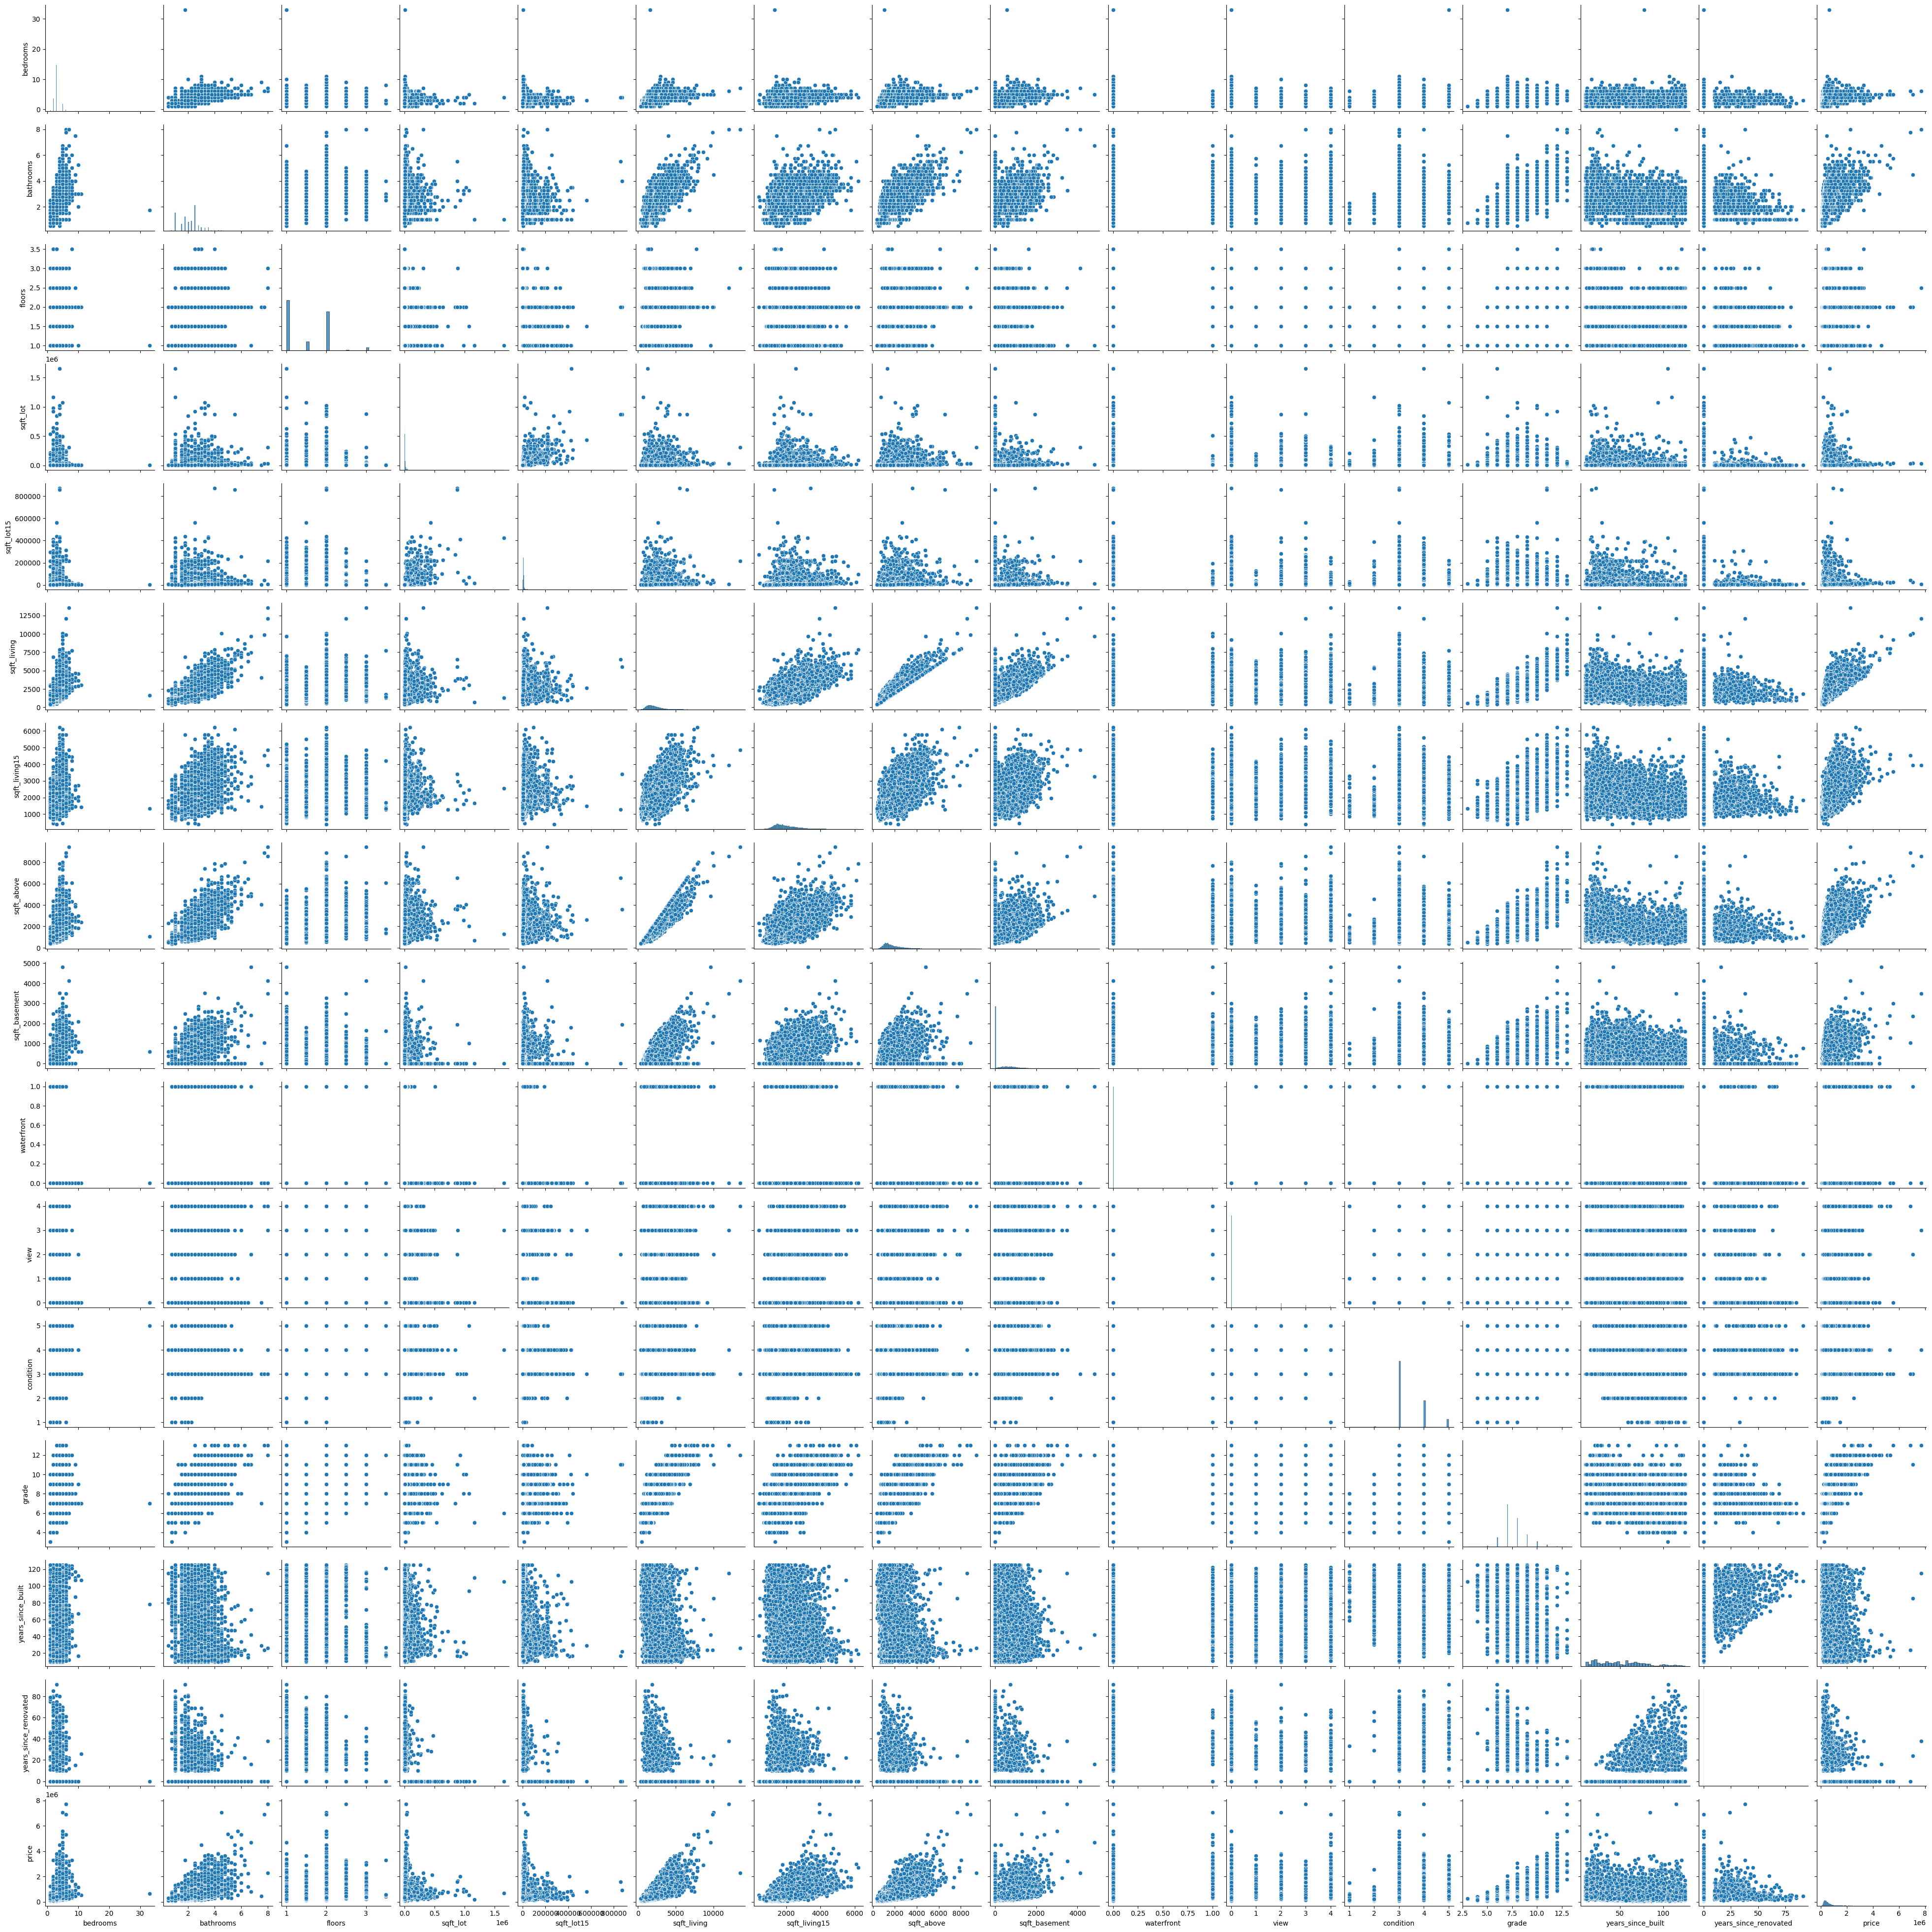

In [11]:
# Plot distributions and relationships between variables
sns.pairplot(df[selected_columns])
plt.show()

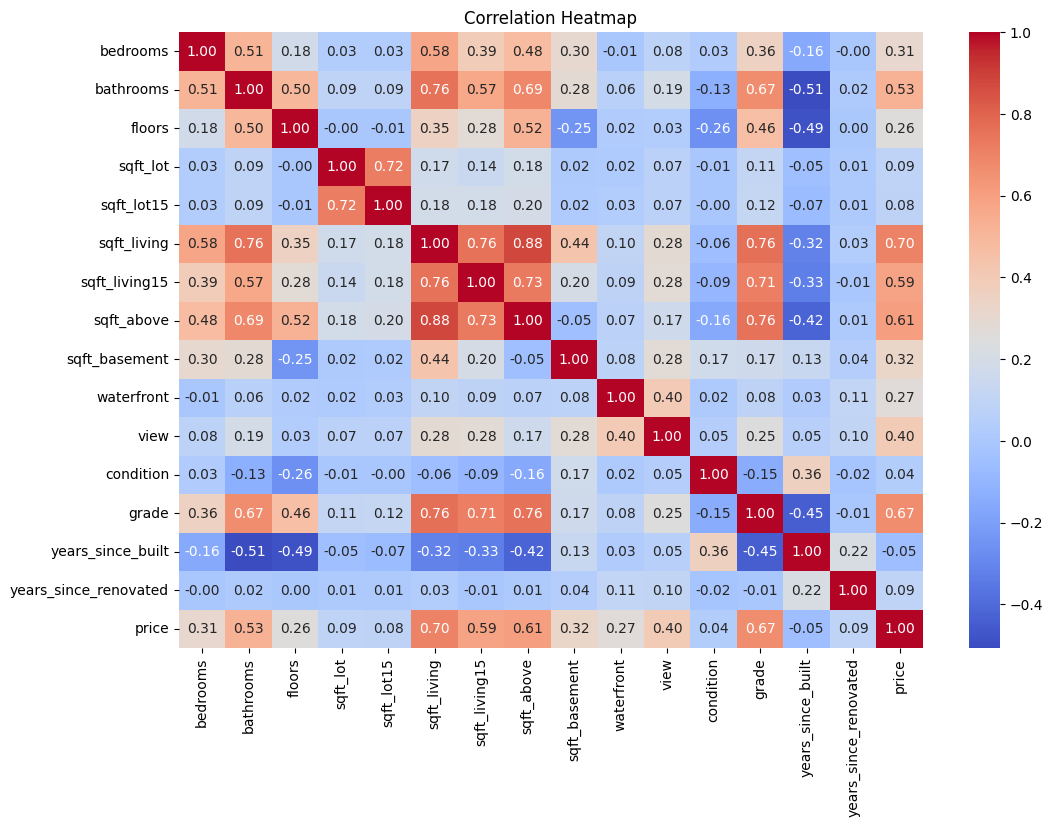

In [12]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# what does a strong correlation between columns mean?
# A strong correlation between columns indicates a significant relationship between the variables, meaning that changes in one variable are associated with changes in another.
# It suggests that one variable can be used to predict or explain the behavior of the other, which is valuable for analysis and modeling.

### Train a regression model to predict house prices

In [14]:
# Split the data into features and target variable
X = df[selected_columns].drop('price', axis=1)
y = df['price']

In [15]:
# Train a regression model to predict house prices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# RFE for feature selection
model = LinearRegression()
rfe = RFE(model, n_features_to_select=7)
fit = rfe.fit(X_train, y_train)
selected_features = X_train.columns[fit.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected.head()

,bathrooms,floors,waterfront,view,condition,grade,years_since_built
6243,2.00,2.00,0,0,4,7,53
8986,1.75,1.00,0,2,4,7,45
9419,2.75,2.00,0,0,3,9,15
10155,2.50,1.00,0,0,3,7,51
10436,2.00,1.50,0,0,5,7,103


### Linear Regression model

In [18]:
# Linear Regression model without scaling
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
lr_r2_train = r2_score(y_train, model.predict(X_train))
lr_r2_test = r2_score(y_test, y_pred)
print(f'R-squared (Train): {lr_r2_train:.2f}')
print(f'R-squared (Test): {lr_r2_test:.2f}')

R-squared (Train): 0.66
R-squared (Test): 0.63


In [19]:
# Linear regression model with scaling
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = model.predict(X_test_scaled)
# Evaluate the model
lr_scaled_r2_train = r2_score(y_train, model.predict(X_train_scaled))
lr_scaled_r2_test = r2_score(y_test, y_pred)
print(f'R-squared (Train): {lr_scaled_r2_train:.2f}')
print(f'R-squared (Test): {lr_scaled_r2_test:.2f}')

R-squared (Train): 0.66
R-squared (Test): 0.63


In [20]:
# Linear Regression with RFE-selected features
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_train = model_selected.predict(X_train_selected)
y_pred_test = model_selected.predict(X_test_selected)

# Evaluate the model
lr_rfe_r2_train = r2_score(y_train, y_pred_train)
lr_rfe_r2_test = r2_score(y_test, y_pred_test)
print(f'R-squared (Train): {lr_rfe_r2_train:.2f}')
print(f'R-squared (Test): {lr_rfe_r2_test:.2f}')

R-squared (Train): 0.61
R-squared (Test): 0.59


In [21]:
# Linear Regression with K-Folds Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model_cv = LinearRegression()
cv_scores = cross_val_score(model_cv, X, y, cv=kf, scoring='r2')
print(f'Cross-Validation R-squared scores: {cv_scores}')
print(f'Average Cross-Validation R-squared: {cv_scores.mean():.2f}')

Cross-Validation R-squared scores: [0.63486499 0.64378253 0.66701023 0.67647084 0.63336896]
Average Cross-Validation R-squared: 0.65


### KNN Regressor model

In [22]:
# KNN regressor without scaling
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
# Make predictions
y_knn_pred = knn_model.predict(X_test)
# Evaluate the model
knn_r2_train = r2_score(y_train, knn_model.predict(X_train))
knn_r2_test = r2_score(y_test, y_knn_pred)
print(f'KNN R-squared (Train): {knn_r2_train:.2f}')
print(f'KNN R-squared (Test): {knn_r2_test:.2f}')

KNN R-squared (Train): 0.67
KNN R-squared (Test): 0.49

KNN R-squared (Test): 0.49


In [23]:
# KNN regressor with scaling
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
# Make predictions
y_knn_pred = knn_model.predict(X_test_scaled)
# Evaluate the model
knn_scaled_r2_train = r2_score(y_train, knn_model.predict(X_train_scaled))
knn_scaled_r2_test = r2_score(y_test, y_knn_pred)
print(f'KNN R-squared (Train): {knn_scaled_r2_train:.2f}')
print(f'KNN R-squared (Test): {knn_scaled_r2_test:.2f}')

KNN R-squared (Train): 0.80
KNN R-squared (Test): 0.68


In [24]:
# KNN regressor with RFE-selected features
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_selected, y_train)
# Make predictions
y_knn_pred = knn_model.predict(X_test_selected)
# Evaluate the model
knn_rfe_r2_train = r2_score(y_train, knn_model.predict(X_train_selected))
knn_rfe_r2_test = r2_score(y_test, y_knn_pred)
print(f'KNN R-squared (Train): {knn_rfe_r2_train:.2f}')
print(f'KNN R-squared (Test): {knn_rfe_r2_test:.2f}')

KNN R-squared (Train): 0.73
KNN R-squared (Test): 0.57


### Decision Tree Regressor model

In [25]:
# Decision Tree Regressor without scaling
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
# Make predictions
y_dt_pred = dt_model.predict(X_test)
# Evaluate the model
dt_r2_train = r2_score(y_train, dt_model.predict(X_train))
dt_r2_test = r2_score(y_test, y_dt_pred)
print(f'Decision Tree R-squared (Train): {dt_r2_train:.2f}')
print(f'Decision Tree R-squared (Test): {dt_r2_test:.2f}')

Decision Tree R-squared (Train): 0.84
Decision Tree R-squared (Test): 0.66


In [26]:
# Decision Tree Regressor with scaling
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train_scaled, y_train)
# Make predictions
y_dt_pred = dt_model.predict(X_test_scaled)
# Evaluate the model
dt_r2_scaled_train = r2_score(y_train, dt_model.predict(X_train_scaled))
dt_r2_scaled_test = r2_score(y_test, y_dt_pred)
print(f'Decision Tree R-squared (Train): {dt_r2_scaled_train:.2f}')
print(f'Decision Tree R-squared (Test): {dt_r2_scaled_test:.2f}')

Decision Tree R-squared (Train): 0.84
Decision Tree R-squared (Test): 0.66


In [27]:
# Decision Tree Regressor with RFE-selected features
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train_selected, y_train)
# Make predictions
y_dt_pred = dt_model.predict(X_test_selected)
# Evaluate the model
dt_r2_rfe_train = r2_score(y_train, dt_model.predict(X_train_selected))
dt_r2_rfe_test = r2_score(y_test, y_dt_pred)
print(f'Decision Tree R-squared (Train): {dt_r2_rfe_train:.2f}')
print(f'Decision Tree R-squared (Test): {dt_r2_rfe_test:.2f}')

Decision Tree R-squared (Train): 0.79
Decision Tree R-squared (Test): 0.59


In [28]:
# Decision Tree Regressor with Cross-Validation and Hyperparameter Tuning
dt_model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)
best_dt_model = grid_search.best_estimator_
# Make predictions
y_dt_pred = best_dt_model.predict(X_test)
# Evaluate the model
dt_cv_r2_train = r2_score(y_train, best_dt_model.predict(X_train))
dt_cv_r2_test = r2_score(y_test, y_dt_pred)
print(f'Decision Tree CV R-squared (Train): {dt_cv_r2_train:.2f}')
print(f'Decision Tree CV R-squared (Test): {dt_cv_r2_test:.2f}')

Decision Tree CV R-squared (Train): 0.81
Decision Tree CV R-squared (Test): 0.68


### Random Forest Regressor model

In [29]:
# Random Forest Regressor model without scaling
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions
y_rf_pred = rf_model.predict(X_test)
# Evaluate the model
rf_r2_train = r2_score(y_train, rf_model.predict(X_train))
rf_r2_test = r2_score(y_test, y_rf_pred)
print(f'Random Forest R-squared (Train): {rf_r2_train:.2f}')
print(f'Random Forest R-squared (Test): {rf_r2_test:.2f}')

Random Forest R-squared (Train): 0.86
Random Forest R-squared (Test): 0.74


In [30]:
# Random Forest Regressor model with scaling
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Make predictions
y_rf_pred = rf_model.predict(X_test_scaled)
# Evaluate the model
rf_scaled_r2_train = r2_score(y_train, rf_model.predict(X_train_scaled))
rf_scaled_r2_test = r2_score(y_test, y_rf_pred)
print(f'Random Forest R-squared (Train): {rf_scaled_r2_train:.2f}')
print(f'Random Forest R-squared (Test): {rf_scaled_r2_test:.2f}')

Random Forest R-squared (Train): 0.86
Random Forest R-squared (Test): 0.74


In [31]:
# Random Forest Regressor model with RFE-selected features
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_selected, y_train)
# Make predictions
y_rf_pred = rf_model.predict(X_test_selected)
# Evaluate the model
rf_rfe_r2_train = r2_score(y_train, rf_model.predict(X_train_selected))
rf_rfe_r2_test = r2_score(y_test, y_rf_pred)
print(f'Random Forest R-squared (Train): {rf_rfe_r2_train:.2f}')
print(f'Random Forest R-squared (Test): {rf_rfe_r2_test:.2f}')

Random Forest R-squared (Train): 0.80
Random Forest R-squared (Test): 0.64


### Best model selection and evaluation

In [32]:
# Compare R-squared (Test) scores for all models
model_scores = {
    "Linear Regression": lr_r2_test,
    "Linear Regression (scaled)": lr_scaled_r2_test,
    "Linear Regression (RFE-selected features)": lr_rfe_r2_test,
    "KNN Regressor": knn_r2_test,
    "KNN Regressor (scaled)": knn_scaled_r2_test,
    "KNN Regressor (RFE-selected features)": knn_rfe_r2_test,
    "Decision Tree Regressor": dt_r2_test,
    "Decision Tree Regressor (scaled)": dt_r2_scaled_test,
    "Decision Tree Regressor (RFE-selected features)": dt_r2_rfe_test,
    "Decision Tree Regressor (CV & Tuning)": dt_cv_r2_test,
    "Random Forest Regressor": rf_r2_test,
    "Random Forest Regressor (scaled)": rf_scaled_r2_test,
    "Random Forest Regressor (RFE-selected features)": rf_rfe_r2_test
}

# Print all model scores for comparison
print("All Model Scores (R-squared Test):")
for name, score in model_scores.items():
    print(f"{name}: {score:.4f}")

print("\n" + "="*50)

best_score = max(model_scores.values())
# Use a small tolerance for floating point comparison
tolerance = 1e-6
best_models = [name for name, score in model_scores.items() if abs(score - best_score) < tolerance]

if len(best_models) > 1:
    print(f"Draw between models: {', '.join(best_models)} with R-squared (Test): {best_score:.4f}")
else:
    best_model = best_models[0]
    print(f"Best model: {best_model} with R-squared (Test): {best_score:.4f}")

All Model Scores (R-squared Test):
Linear Regression: 0.6349
Linear Regression (scaled): 0.6349
Linear Regression (RFE-selected features): 0.5904
KNN Regressor: 0.4870
KNN Regressor (scaled): 0.6769
KNN Regressor (RFE-selected features): 0.5725
Decision Tree Regressor: 0.6618
Decision Tree Regressor (scaled): 0.6615
Decision Tree Regressor (RFE-selected features): 0.5873
Decision Tree Regressor (CV & Tuning): 0.6839
Random Forest Regressor: 0.7435
Random Forest Regressor (scaled): 0.7433
Random Forest Regressor (RFE-selected features): 0.6448

Best model: Random Forest Regressor with R-squared (Test): 0.7435
